### Exercício 2

Escolha um conjunto de dados pequeno ou médio (de 100 a 500 linhas) de sua preferência. 
Sugestões:
- Dados esportivos (resultados de jogos, medalhas, rankings)
- Dados ambientais (chuvas, temperaturas, qualidade do ar)
- Dados de séries ou músicas (Spotify, IMDb, etc.)

Carregue o conjunto de dados em Python usando pandas ou outra forma que considerar ideal.
Produza ao menos 4 tipos diferentes de visualizações, com foco em:
- Gráfico de barras
- Gráfico de dispersão (scatter plot)
- Histograma
- Gráfico de linha
- (Extra: mapa, boxplot, heatmap, gráfico de pizza, violin plot, etc.)

Para cada gráfico:
- Personalize os eixos, títulos e cores
- Destaque algum insight ou observação relevante
- Escreva ao menos 2 parágrafo explicando o que a visualização mostra e por que ela é adequada (ou não) para aquele dado

In [1]:
import pandas as pd
import numpy as np

# Conjunto de dados: IMDB Top 250 Movies
url = "https://raw.githubusercontent.com/itiievskyi/IMDB-Top-250/master/imdb_top_250.csv"
df = pd.read_csv(url)

# Informações iniciais sobre o conjunto de dados
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print()

# Primeiras 5 linhas do conjunto de dados
print("=== FIRST 5 ROWS ===")
print(df.head())
print()

#Tipo de dados e valores ausentes
print("=== DATA TYPES & MISSING VALUES ===")
print(df.info())
print()

# Estatísticas numéricas de colunas como 'rating', 'duration', etc.
print("=== NUMERICAL STATISTICS ===")
print(df.describe())
print()

# Entradas unicas e amostras de valores
print("=== SAMPLE UNIQUE VALUES ===")
if 'genre' in df.columns:
    print(f"Sample genres: {df['genre'].value_counts().head()}")
elif 'genres' in df.columns:
    print(f"Sample genres: {df['genres'].value_counts().head()}")

if 'year' in df.columns:
    print(f"Year range: {df['year'].min()} - {df['year'].max()}")
elif 'movie_year' in df.columns:
    print(f"Year range: {df['movie_year'].min()} - {df['movie_year'].max()}")

=== DATASET OVERVIEW ===
Dataset shape: (250, 10)
Columns: ['Unnamed: 0', 'Title', 'Year', 'Genre', 'Duration', 'Origin', 'Director', 'IMDB rating', 'Rating count', 'IMDB link']

=== FIRST 5 ROWS ===
   Unnamed: 0                     Title  Year  \
0           1  The Shawshank Redemption  1994   
1           2             The Godfather  1972   
2           3    The Godfather: Part II  1974   
3           4           The Dark Knight  2008   
4           5              12 Angry Men  1957   

                               Genre  Duration    Origin  \
0                              Drama  2h 22min       USA   
1                      Drama | Crime  2h 55min       USA   
2                      Drama | Crime  3h 22min       USA   
3  Drama | Action | Thriller | Crime  2h 32min  USA | UK   
4                              Drama  1h 36min       USA   

               Director  IMDB rating  Rating count  \
0        Frank Darabont          9.3       2030817   
1  Francis Ford Coppola          9.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
url = "https://raw.githubusercontent.com/itiievskyi/IMDB-Top-250/master/imdb_top_250.csv"
df = pd.read_csv(url)

# Clean and prepare data
df['Decade'] = (df['Year'] // 10) * 10
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int) * 60 + \
                        df['Duration'].str.extract('(\d+)min').fillna(0).astype(int)

print("Data loaded and preprocessed successfully!")
print(f"Dataset shape: {df.shape}")

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_6155/2484849855.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_minutes'] = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int) * 60 + \
/tmp/ipykernel_6155/2484849855.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'].str.extract('(\d+)min').fillna(0).astype(int)


Data loaded and preprocessed successfully!
Dataset shape: (250, 12)


Sample Genre values:
['Drama', 'Drama | Crime', 'Drama | Crime', 'Drama | Action | Thriller | Crime', 'Drama', 'Drama | Biography | History', 'Drama | Adventure | Fantasy | Action', 'Drama | Crime', 'Western', 'Drama']

Unique genre combinations:
Genre
Drama                       26
Drama | Crime               14
Drama | Thriller | Crime    10
Drama | War                  9
Drama | Romance              8
Name: count, dtype: int64

Top 10 genres after cleaning:
Drama        184
Thriller      61
Adventure     57
Crime         50
Comedy        46
Action        35
Mystery       33
Fantasy       31
War           29
Romance       28
Name: count, dtype: int64


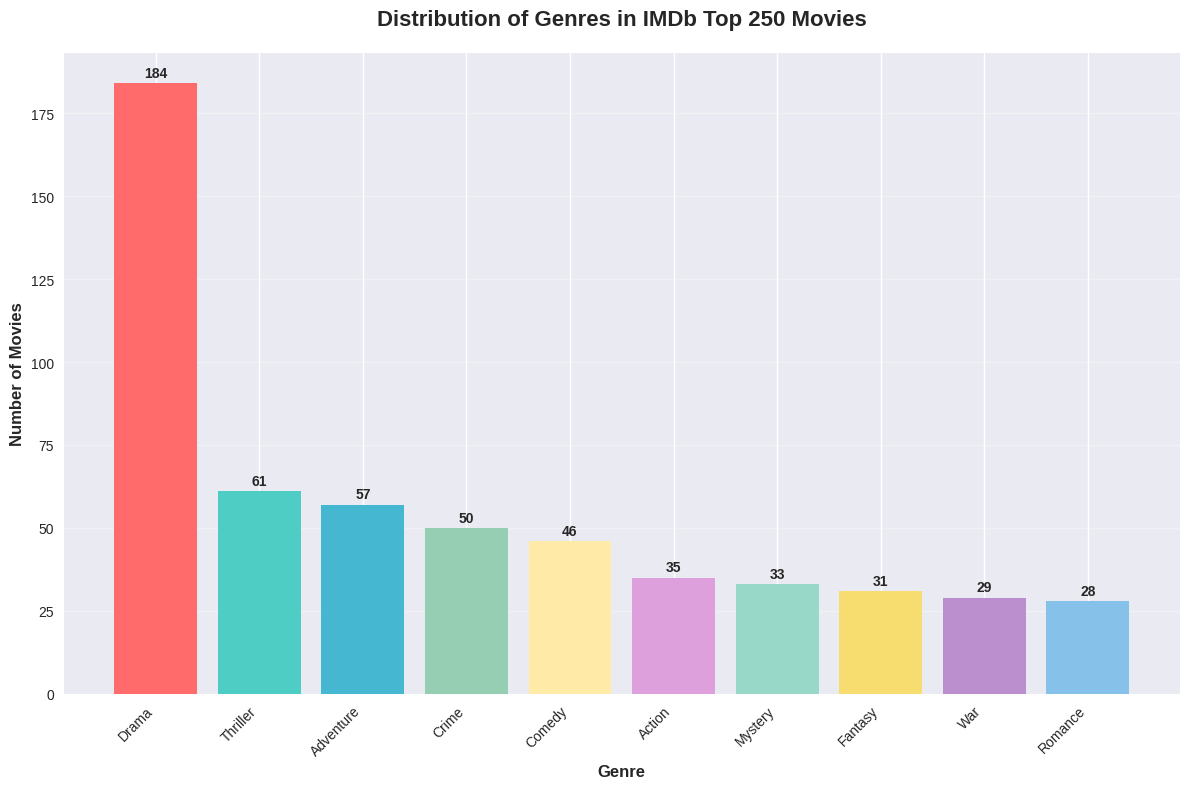


Drama appears in 184 movies, making it the most common genre.
Second most common: Thriller with 61 movies.


In [6]:
# First, let's examine the Genre column to see what's causing the issue
print("Sample Genre values:")
print(df['Genre'].head(10).tolist())
print("\nUnique genre combinations:")
print(df['Genre'].value_counts().head())

# Extract and count genres, but clean the data first
genres_list = []
for genre_string in df['Genre']:
    if pd.notna(genre_string) and genre_string.strip():  # Check for valid strings
        # Split by ' | ' and clean each genre
        genres = [g.strip() for g in str(genre_string).split(' | ') if g.strip() and g.strip() != '\\']
        genres_list.extend(genres)

# Count genres and get top 10
genre_counts = pd.Series(genres_list).value_counts().head(10)

# Remove any remaining problematic entries
genre_counts = genre_counts[genre_counts.index != '\\']
genre_counts = genre_counts[genre_counts.index != '']

print(f"\nTop 10 genres after cleaning:")
print(genre_counts)

# Create bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts.index, genre_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
                      '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9'])

# Customize the plot
plt.title('Distribution of Genres in IMDb Top 250 Movies', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDrama appears in {genre_counts['Drama']} movies, making it the most common genre.")
print(f"Second most common: {genre_counts.index[1]} with {genre_counts.iloc[1]} movies.")

In [9]:
import plotly.express as px
import plotly.graph_objects as go

# Create interactive scatter plot with proper hover data
fig = px.scatter(df, x='Year', y='IMDB rating', 
                 size='Rating count', 
                 color='Duration_minutes',
                 hover_name='Title',  # This will be the main title in hover
                 hover_data={
                     'Director': True,
                     'Genre': True,
                     'Year': True,
                     'IMDB rating': ':.1f',
                     'Duration_minutes': True,
                     'Rating count': ':,d'
                 },
                 title='IMDb Rating vs. Release Year (Interactive - Top 250 Movies)',
                 labels={
                     'IMDB rating': 'IMDb Rating', 
                     'Year': 'Release Year',
                     'Duration_minutes': 'Duration (minutes)', 
                     'Rating count': 'Number of Ratings'
                 },
                 color_continuous_scale='viridis',
                 size_max=20)

# Customize the appearance (remove the problematic custom hover template)
fig.update_traces(
    marker=dict(
        line=dict(width=1, color='DarkSlateGrey'),
        opacity=0.8
    )
)

# Update layout for better appearance
fig.update_layout(
    height=700,
    width=1000,
    title_font_size=16,
    title_x=0.5,
    xaxis=dict(
        title_font_size=14,
        tickfont_size=12,
        gridcolor='lightgray',
        gridwidth=0.5
    ),
    yaxis=dict(
        title_font_size=14,
        tickfont_size=12,
        gridcolor='lightgray',
        gridwidth=0.5,
        range=[7.9, 9.4]  # Focus on the actual rating range
    ),
    plot_bgcolor='white',
    coloraxis_colorbar=dict(
        title_font_size=12,
        tickfont_size=10
    )
)

# Add annotations for key insights
highest_rated = df.loc[df['IMDB rating'].idxmax()]
oldest_movie = df.loc[df['Year'].idxmin()]
most_voted = df.loc[df['Rating count'].idxmax()]

# Highlight the highest rated movie
fig.add_annotation(
    x=highest_rated['Year'],
    y=highest_rated['IMDB rating'],
    text=f"Highest Rated:<br>{highest_rated['Title']}<br>({highest_rated['IMDB rating']})",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="red",
    ax=50,
    ay=-50,
    bgcolor="yellow",
    bordercolor="red",
    borderwidth=2,
    font=dict(size=10, color="black")
)

# Highlight the most voted movie
fig.add_annotation(
    x=most_voted['Year'],
    y=most_voted['IMDB rating'],
    text=f"Most Voted:<br>{most_voted['Title']}<br>({most_voted['Rating count']:,} votes)",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="blue",
    ax=-80,
    ay=30,
    bgcolor="lightblue",
    bordercolor="blue",
    borderwidth=2,
    font=dict(size=10, color="black")
)

fig.show()

# Print key insights
print("🎬 KEY INSIGHTS FROM THE INTERACTIVE SCATTER PLOT:")
print(f"📊 Highest rated: {highest_rated['Title']} ({highest_rated['IMDB rating']})")
print(f"🗳️  Most voted: {most_voted['Title']} ({most_voted['Rating count']:,} votes)")
print(f"📅 Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"⭐ Rating range: {df['IMDB rating'].min()} - {df['IMDB rating'].max()}")
print(f"🎭 Total movies: {len(df)}")
print("\n💡 INTERACTIVE FEATURES:")
print("• Hover over points to see movie details")
print("• Zoom in/out using mouse wheel or toolbar")
print("• Pan by clicking and dragging")
print("• Use toolbar to download as PNG")

🎬 KEY INSIGHTS FROM THE INTERACTIVE SCATTER PLOT:
📊 Highest rated: The Shawshank Redemption (9.3)
🗳️  Most voted: The Shawshank Redemption (2,030,817 votes)
📅 Year range: 1921 - 2018
⭐ Rating range: 8.0 - 9.3
🎭 Total movies: 250

💡 INTERACTIVE FEATURES:
• Hover over points to see movie details
• Zoom in/out using mouse wheel or toolbar
• Pan by clicking and dragging
• Use toolbar to download as PNG


/tmp/ipykernel_6155/3618024396.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('RdYlBu_r')


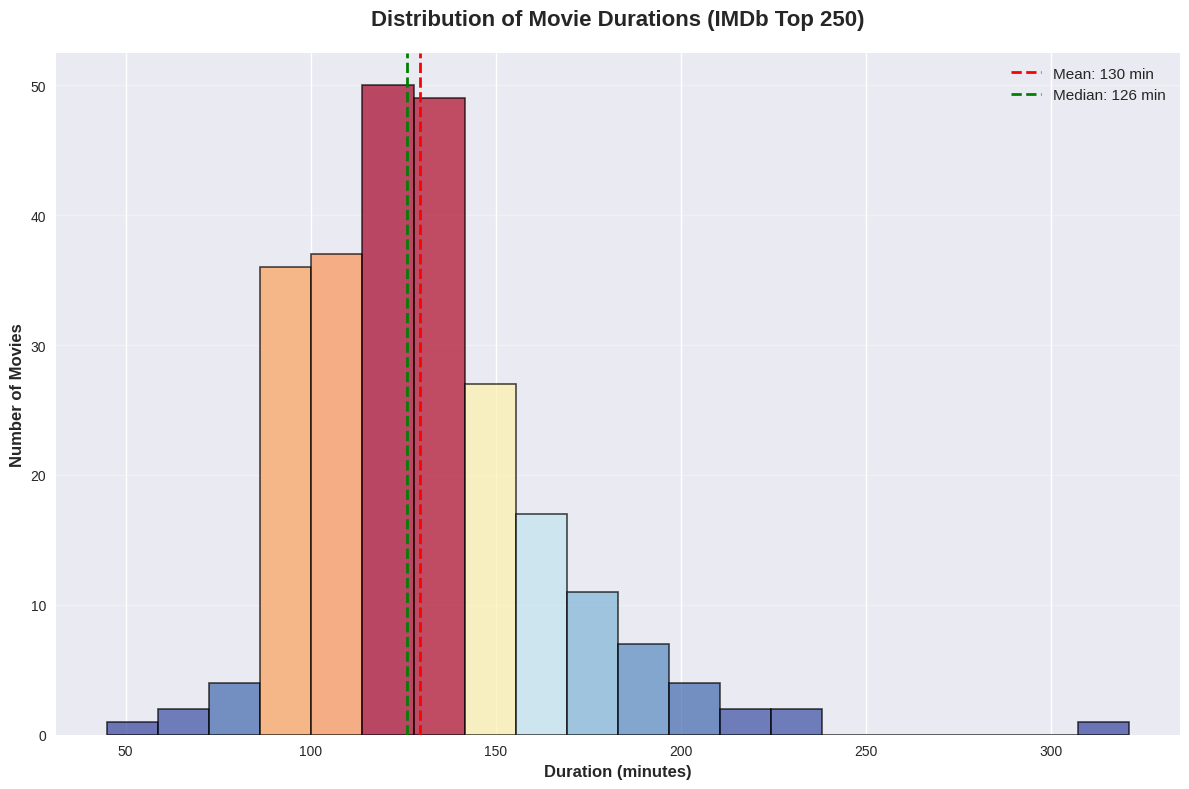

Average duration: 129.7 minutes (2.2 hours)
Shortest: 45 min, Longest: 321 min


In [4]:
# Create histogram
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(df['Duration_minutes'], bins=20, 
                           color='skyblue', alpha=0.7, edgecolor='black', linewidth=1.2)

# Color bars based on frequency
cm = plt.cm.get_cmap('RdYlBu_r')
for i, p in enumerate(patches):
    p.set_facecolor(cm(n[i] / max(n)))

# Customize the plot
plt.title('Distribution of Movie Durations (IMDb Top 250)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')

# Add statistics
mean_duration = df['Duration_minutes'].mean()
median_duration = df['Duration_minutes'].median()

plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_duration:.0f} min')
plt.axvline(median_duration, color='green', linestyle='--', linewidth=2, 
           label=f'Median: {median_duration:.0f} min')

plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average duration: {mean_duration:.1f} minutes ({mean_duration/60:.1f} hours)")
print(f"Shortest: {df['Duration_minutes'].min()} min, Longest: {df['Duration_minutes'].max()} min")

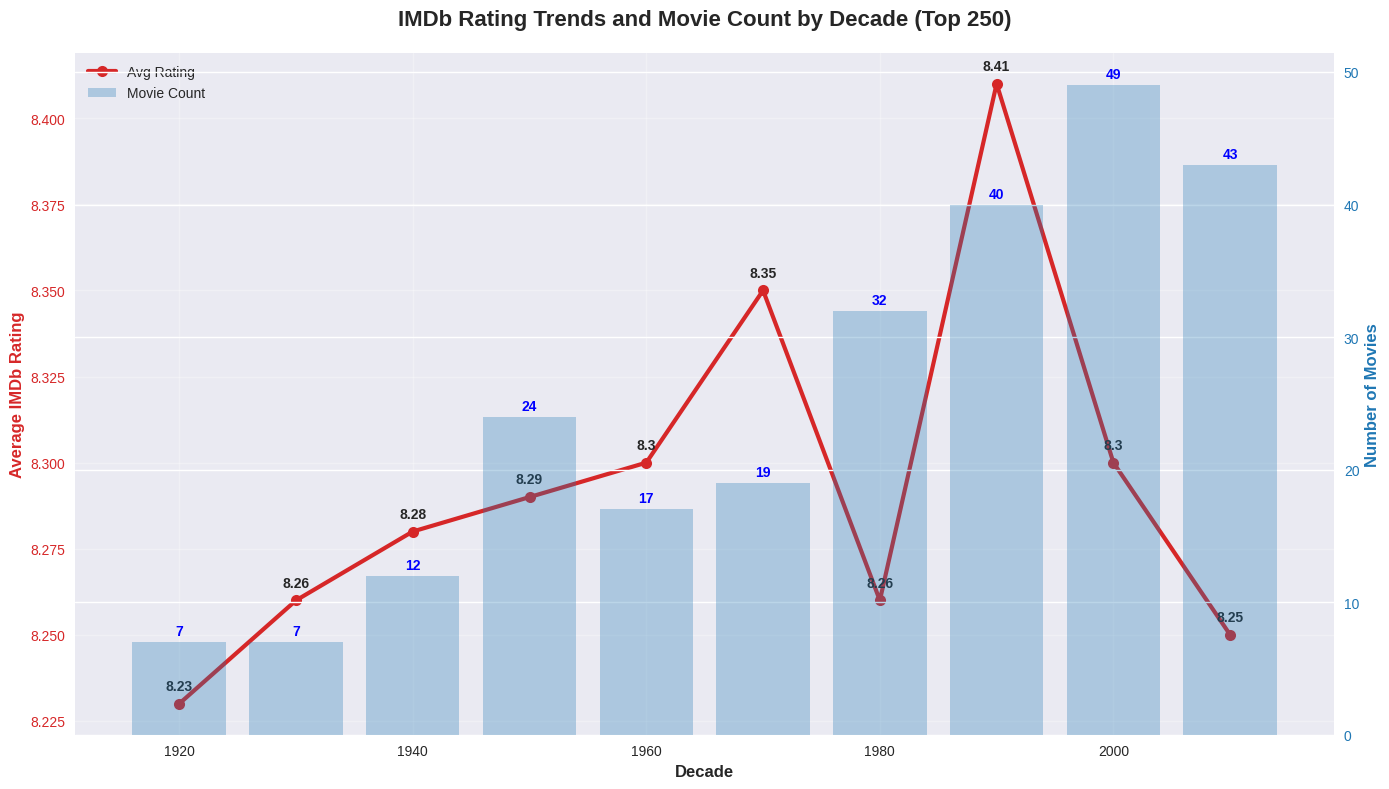

Decade with highest average rating: 1990
Most productive decade: 2000


In [5]:
# Calculate average rating by decade
decade_stats = df.groupby('Decade').agg({
    'IMDB rating': ['mean', 'count'],
    'Year': 'count'
}).round(2)

decade_stats.columns = ['Avg_Rating', 'Movie_Count', 'Total_Movies']
decade_stats = decade_stats.reset_index()

# Create line chart with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot average rating
color = 'tab:red'
ax1.set_xlabel('Decade', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average IMDb Rating', color=color, fontsize=12, fontweight='bold')
line1 = ax1.plot(decade_stats['Decade'], decade_stats['Avg_Rating'], 
                color=color, marker='o', linewidth=3, markersize=8, label='Avg Rating')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for movie count
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Movies', color=color, fontsize=12, fontweight='bold')
bars = ax2.bar(decade_stats['Decade'], decade_stats['Movie_Count'], 
               alpha=0.3, color=color, width=8, label='Movie Count')
ax2.tick_params(axis='y', labelcolor=color)

# Customize the plot
plt.title('IMDb Rating Trends and Movie Count by Decade (Top 250)', 
          fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, (decade, rating, count) in enumerate(zip(decade_stats['Decade'], 
                                               decade_stats['Avg_Rating'], 
                                               decade_stats['Movie_Count'])):
    ax1.annotate(f'{rating}', (decade, rating), textcoords="offset points", 
                xytext=(0,10), ha='center', fontweight='bold')
    ax2.annotate(f'{count}', (decade, count), textcoords="offset points", 
                xytext=(0,5), ha='center', fontweight='bold', color='blue')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

print("Decade with highest average rating:", 
      decade_stats.loc[decade_stats['Avg_Rating'].idxmax(), 'Decade'])
print("Most productive decade:", 
      decade_stats.loc[decade_stats['Movie_Count'].idxmax(), 'Decade'])

In [10]:
import plotly.express as px
import pandas as pd

# Prepare data for sunburst chart
sunburst_data = []
for _, row in df.iterrows():
    # Clean and split genres
    genres = [g.strip() for g in str(row['Genre']).split(' | ') 
              if g.strip() and g.strip() != '\\' and g.strip() != '']
    
    for genre in genres:
        sunburst_data.append({
            'Decade': f"{int(row['Decade'])}s",
            'Genre': genre,
            'Title': row['Title'],
            'Rating': row['IMDB rating'],
            'Year': row['Year'],
            'Director': row['Director'],
            'Count': 1  # Each movie counts as 1
        })

sunburst_df = pd.DataFrame(sunburst_data)

# Create the sunburst chart
fig = px.sunburst(sunburst_df, 
                  path=['Decade', 'Genre'], 
                  values='Count',
                  color='Rating',
                  hover_data=['Title', 'Director', 'Year'],
                  title='Movie Genres Distribution by Decade (Interactive Sunburst)',
                  color_continuous_scale='RdYlBu_r',
                  color_continuous_midpoint=8.3)

# Customize the layout
fig.update_layout(
    height=800,
    width=800,
    title_font_size=16,
    title_x=0.5,
    font_size=12
)

# Update traces for better hover information
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>' +
                  'Count: %{value}<br>' +
                  'Percentage: %{percentParent}<br>' +
                  '<extra></extra>',
    maxdepth=2
)

fig.show()

# Print insights
decade_genre_summary = sunburst_df.groupby(['Decade', 'Genre']).size().reset_index(name='Count')
print("🎭 SUNBURST CHART INSIGHTS:")
print("\n📊 Most Popular Genre-Decade Combinations:")
top_combinations = decade_genre_summary.nlargest(5, 'Count')
for _, row in top_combinations.iterrows():
    print(f"   • {row['Genre']} in {row['Decade']}: {row['Count']} movies")

print(f"\n🎬 Total genre-movie combinations: {len(sunburst_df)}")
print(f"📅 Decades covered: {len(sunburst_df['Decade'].unique())}")
print(f"🎭 Unique genres: {len(sunburst_df['Genre'].unique())}")

print("\n💡 HOW TO USE:")
print("• Click on decade rings to drill down into genres")
print("• Click center to zoom back out")
print("• Hover for detailed information")
print("• Color intensity shows average rating")

🎭 SUNBURST CHART INSIGHTS:

📊 Most Popular Genre-Decade Combinations:
   • Drama in 2000s: 37 movies
   • Drama in 2010s: 33 movies
   • Drama in 1990s: 31 movies
   • Drama in 1980s: 19 movies
   • Drama in 1950s: 18 movies

🎬 Total genre-movie combinations: 668
📅 Decades covered: 10
🎭 Unique genres: 19

💡 HOW TO USE:
• Click on decade rings to drill down into genres
• Click center to zoom back out
• Hover for detailed information
• Color intensity shows average rating


In [11]:
import plotly.express as px
import pandas as pd

# Prepare data for animated bar chart
animated_data = []
decades = sorted(df['Decade'].unique())

for decade in decades:
    decade_movies = df[df['Decade'] == decade]
    
    # Extract all genres for this decade
    genres_list = []
    for genre_string in decade_movies['Genre']:
        genres = [g.strip() for g in str(genre_string).split(' | ') 
                  if g.strip() and g.strip() != '\\' and g.strip() != '']
        genres_list.extend(genres)
    
    # Count genres and get top 10 for this decade
    genre_counts = pd.Series(genres_list).value_counts().head(10)
    
    # Calculate average rating for each genre in this decade
    for genre, count in genre_counts.items():
        genre_movies = decade_movies[decade_movies['Genre'].str.contains(genre, na=False)]
        avg_rating = genre_movies['IMDB rating'].mean() if len(genre_movies) > 0 else 0
        
        animated_data.append({
            'Decade': f"{int(decade)}s",
            'Genre': genre,
            'Count': count,
            'Avg_Rating': round(avg_rating, 2),
            'Decade_Numeric': int(decade)
        })

animated_df = pd.DataFrame(animated_data)

# Create animated bar chart
fig = px.bar(animated_df, 
             x='Count', 
             y='Genre',
             color='Avg_Rating',
             animation_frame='Decade',
             orientation='h',
             title='Genre Popularity Evolution Over Decades (Animated)',
             labels={
                 'Count': 'Number of Movies',
                 'Genre': 'Movie Genre',
                 'Avg_Rating': 'Average Rating'
             },
             color_continuous_scale='viridis',
             range_x=[0, animated_df['Count'].max() + 2])

# Customize the animation and layout
fig.update_layout(
    height=700,
    width=1000,
    title_font_size=16,
    title_x=0.5,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    coloraxis_colorbar=dict(
        title="Avg Rating",
        title_font_size=12
    ),
    # Slow down the animation
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 1500, 'redraw': True},
                    'transition': {'duration': 300}
                }]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': False},
                    'mode': 'immediate',
                    'transition': {'duration': 0}
                }]
            }
        ]
    }]
)

# Update animation settings
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig.show()

# Print insights about the animation
print("🎬 ANIMATED BAR CHART INSIGHTS:")
print("\n📈 Genre Evolution Highlights:")

# Find genres that gained/lost popularity
first_decade = animated_df[animated_df['Decade_Numeric'] == animated_df['Decade_Numeric'].min()]
last_decade = animated_df[animated_df['Decade_Numeric'] == animated_df['Decade_Numeric'].max()]

print(f"🕰️  First decade ({first_decade['Decade'].iloc[0]}) top genre: {first_decade.nlargest(1, 'Count')['Genre'].iloc[0]}")
print(f"🆕 Latest decade ({last_decade['Decade'].iloc[0]}) top genre: {last_decade.nlargest(1, 'Count')['Genre'].iloc[0]}")

# Most consistent genre across decades
genre_appearances = animated_df['Genre'].value_counts()
most_consistent = genre_appearances.index[0]
print(f"🏆 Most consistent genre: {most_consistent} (appears in {genre_appearances.iloc[0]} decades)")

print(f"\n📊 Animation covers {len(decades)} decades from {int(min(decades))}s to {int(max(decades))}s")
print("\n💡 ANIMATION CONTROLS:")
print("• Click 'Play' to start the animation")
print("• Click 'Pause' to stop")
print("• Use the slider to jump to specific decades")
print("• Hover over bars for detailed information")
print("• Color shows average rating for each genre")

🎬 ANIMATED BAR CHART INSIGHTS:

📈 Genre Evolution Highlights:
🕰️  First decade (1920s) top genre: Drama
🆕 Latest decade (2010s) top genre: Drama
🏆 Most consistent genre: Drama (appears in 10 decades)

📊 Animation covers 10 decades from 1920s to 2010s

💡 ANIMATION CONTROLS:
• Click 'Play' to start the animation
• Click 'Pause' to stop
• Use the slider to jump to specific decades
• Hover over bars for detailed information
• Color shows average rating for each genre


<>:57: SyntaxWarning: invalid escape sequence '\d'
<>:58: SyntaxWarning: invalid escape sequence '\d'
<>:57: SyntaxWarning: invalid escape sequence '\d'
<>:58: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8758/4002326629.py:57: SyntaxWarning: invalid escape sequence '\d'
  horas_em_minutos = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int) * 60
/tmp/ipykernel_8758/4002326629.py:58: SyntaxWarning: invalid escape sequence '\d'
  minutos = df['Duration'].str.extract('(\d+)min').fillna(0).astype(int)


ETAPA 1: VISÃO GERAL DO DATASET
Dimensões do DataFrame: (250, 10)
Colunas presentes: ['Unnamed: 0', 'Title', 'Year', 'Genre', 'Duration', 'Origin', 'Director', 'IMDB rating', 'Rating count', 'IMDB link']

--- 5 Primeiras Linhas do Dataset ---
   Unnamed: 0                     Title  Year  \
0           1  The Shawshank Redemption  1994   
1           2             The Godfather  1972   
2           3    The Godfather: Part II  1974   
3           4           The Dark Knight  2008   
4           5              12 Angry Men  1957   

                               Genre  Duration    Origin  \
0                              Drama  2h 22min       USA   
1                      Drama | Crime  2h 55min       USA   
2                      Drama | Crime  3h 22min       USA   
3  Drama | Action | Thriller | Crime  2h 32min  USA | UK   
4                              Drama  1h 36min       USA   

               Director  IMDB rating  Rating count  \
0        Frank Darabont          9.3       2030

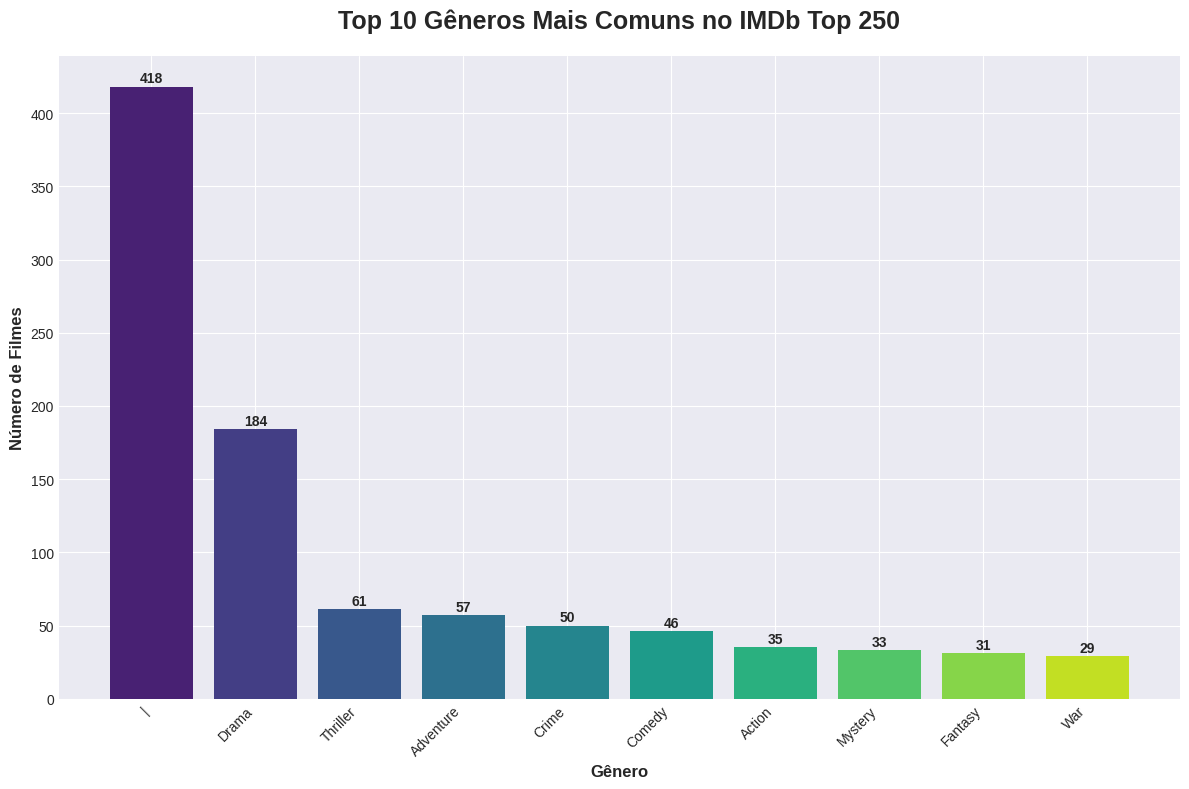


--- Insights do Gráfico de Gêneros ---
O gênero 'Drama' é o mais presente, aparecendo em 184 filmes da lista.
O segundo gênero mais comum é 'Drama' com 184 aparições.
-----------------------------------



--- Insights do Gráfico Interativo de Dispersão ---
🎬 Filme com maior nota: The Shawshank Redemption (Nota 9.3)
🗳️  Filme com mais votos: The Shawshank Redemption (2,030,817 votos)
📅 Período analisado: de 1921 a 2018
⭐ Variação das notas: de 8.0 a 9.3

💡 Dicas de Interação:
• Passe o mouse sobre os pontos para ver detalhes do filme.
• Use a roda do mouse para dar zoom.
• Clique e arraste para mover o gráfico.
-----------------------------------


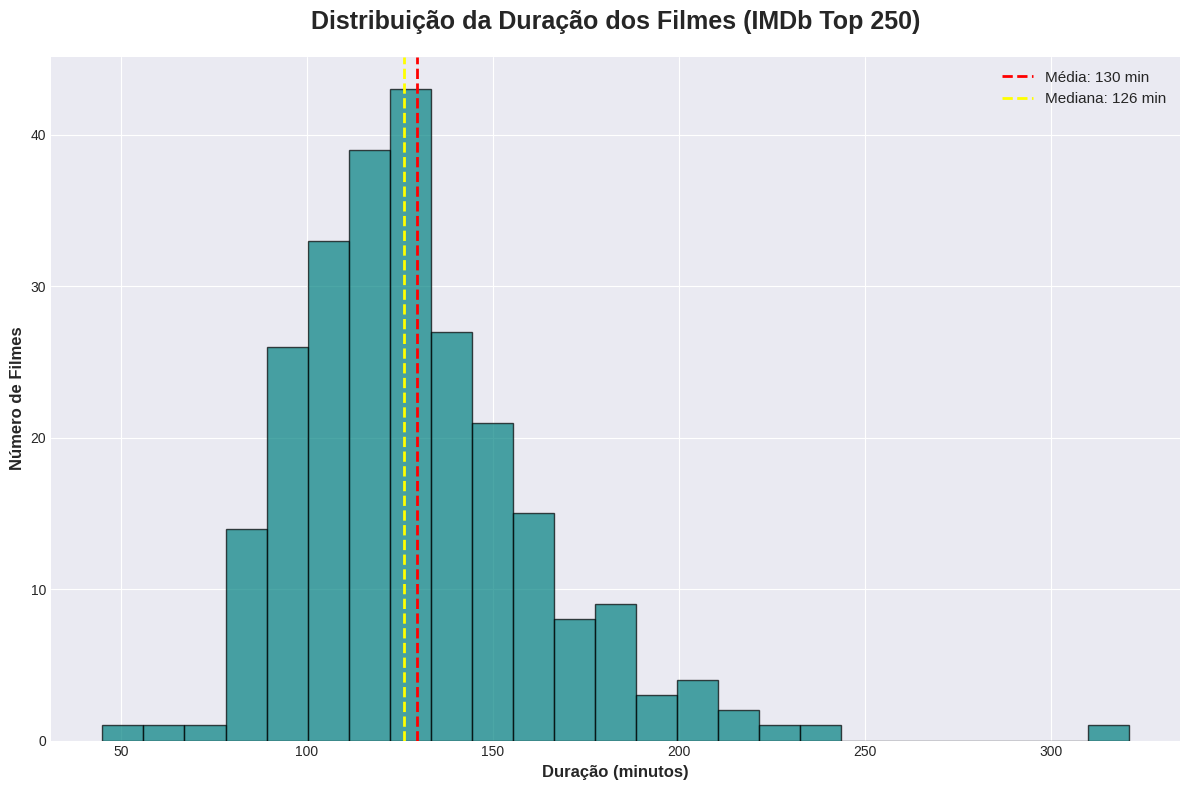


--- Insights do Histograma de Duração ---
A duração média dos filmes é de 129.7 minutos (aproximadamente 2.2 horas).
A maioria dos filmes se concentra na faixa de 100 a 150 minutos.
Filme mais curto: 45 min, Filme mais longo: 321 min.
-----------------------------------


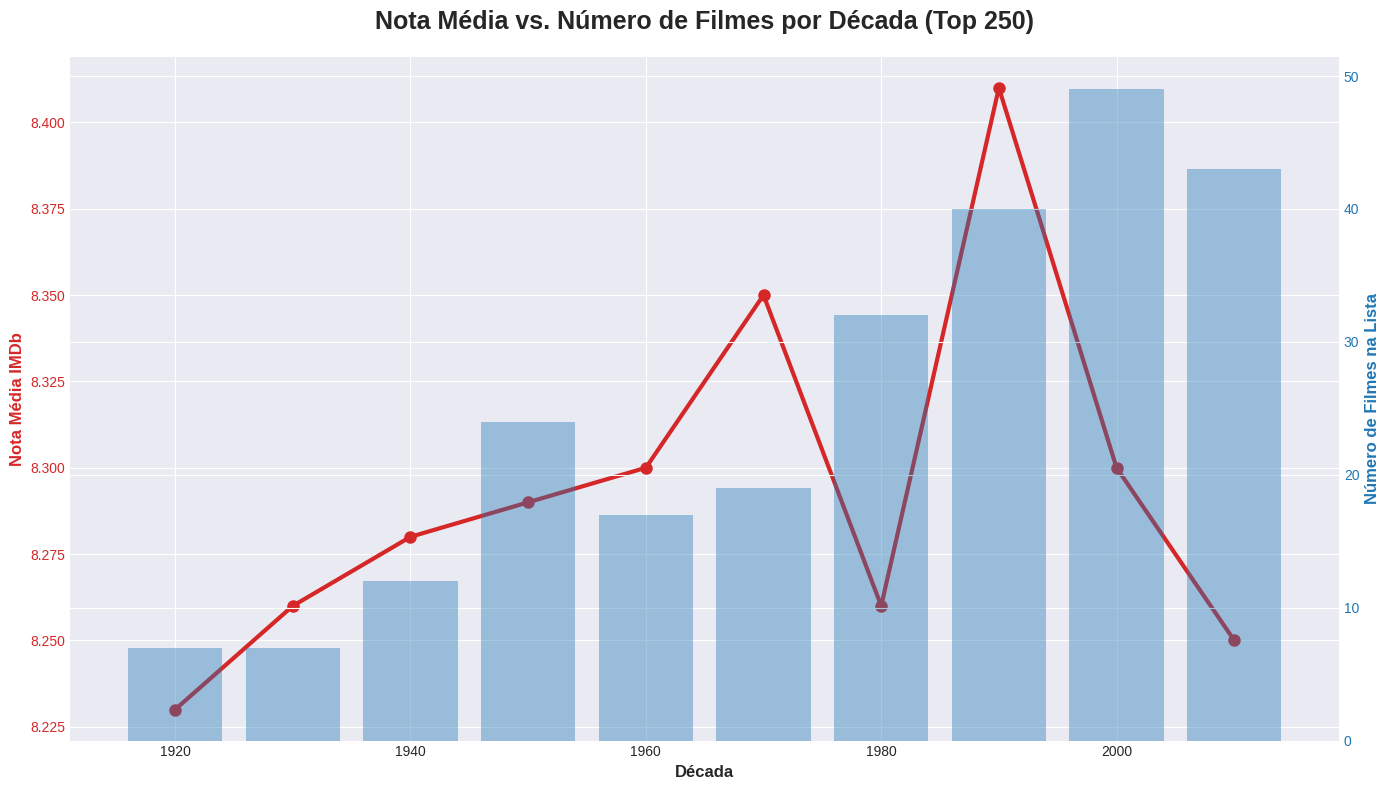


--- Insights do Gráfico de Décadas ---
A década com a maior nota média na lista é a de 1990.
A década mais produtiva (com mais filmes na lista) é a de 2000.
-----------------------------------



--- Insights do Gráfico Sunburst ---

📊 Combinações Gênero-Década mais populares:
   • Drama nos anos 2000s: 37 filmes
   • Drama nos anos 2010s: 33 filmes
   • Drama nos anos 1990s: 31 filmes
   • Drama nos anos 1980s: 19 filmes
   • Drama nos anos 1950s: 18 filmes

💡 Como usar o gráfico:
• Clique em uma década para expandir e ver os gêneros.
• Clique no centro para retornar.
• A intensidade da cor indica a nota média (azul = mais alta).
-----------------------------------

FIM DA ANÁLISE.


In [1]:
# -*- coding: utf-8 -*-
"""
Análise Exploratória de Dados do Top 250 Filmes do IMDb

Este script realiza uma análise do conjunto de dados "IMDB Top 250 Movies".
O objetivo é explorar, limpar e visualizar os dados para extrair insights
sobre os filmes mais bem avaliados da história.

Aluno: [Seu Nome Aqui]
Disciplina: Análise de Dados e Visualização
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# --- 1. Carregamento e Exploração Inicial dos Dados ---

# URL do conjunto de dados bruto no GitHub
url = "https://raw.githubusercontent.com/itiievskyi/IMDB-Top-250/master/imdb_top_250.csv"
# Carregando os dados para um DataFrame do pandas
df = pd.read_csv(url)

print("ETAPA 1: VISÃO GERAL DO DATASET")
print("="*35)
print(f"Dimensões do DataFrame: {df.shape}")
print(f"Colunas presentes: {list(df.columns)}")
print("\n--- 5 Primeiras Linhas do Dataset ---")
print(df.head())
print("\n--- Tipos de Dados e Valores Ausentes ---")
df.info()
print("\n--- Estatísticas Descritivas das Colunas Numéricas ---")
print(df.describe())
print("="*35)
print("\n")


# --- 2. Limpeza e Pré-processamento dos Dados ---

print("ETAPA 2: LIMPEZA E PRÉ-PROCESSAMENTO")
print("="*35)

# Convertendo a coluna 'Year' para numérica e tratando possíveis erros
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Criando uma coluna 'Decada' para agrupar os filmes
# A '//' faz uma divisão inteira, ex: 1994 // 10 = 199, depois * 10 = 1990
df['Decada'] = (df['Year'] // 10) * 10

# A coluna 'Duration' está como texto (ex: '2h 22min'). Vamos convertê-la para minutos.
# Usamos expressões regulares (regex) para extrair as horas e os minutos.
# .str.extract('(\d+)h') captura os dígitos (\d+) antes de 'h'.
# .fillna(0) preenche valores não encontrados (filmes com menos de 1h) com 0.
horas_em_minutos = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int) * 60
minutos = df['Duration'].str.extract('(\d+)min').fillna(0).astype(int)
df['Duration_minutes'] = horas_em_minutos + minutos

# Limpando a coluna 'Genre' de caracteres indesejados
# Primeiro, identificamos e separamos os gêneros
genres_list = df['Genre'].str.split(' | ').explode()
# Removemos strings vazias ou caracteres de escape que possam ter surgido
genres_list = genres_list[genres_list.str.strip() != '']
genres_list = genres_list[genres_list.str.strip() != '\\']

print("Colunas 'Decada' e 'Duration_minutes' criadas com sucesso.")
print(f"Total de gêneros únicos identificados: {genres_list.nunique()}")
print("="*35)
print("\n")


# --- 3. Visualização de Dados ---

print("ETAPA 3: VISUALIZAÇÃO DE DADOS E INSIGHTS")
print("="*40)

# Configurando um estilo visual mais agradável para os gráficos do Matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# -- GRÁFICO 1: Distribuição dos Principais Gêneros --

# Contando a frequência de cada gênero e pegando os 10 mais comuns
genre_counts = genres_list.value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts.index, genre_counts.values,
               color=sns.color_palette("viridis", n_colors=10))

# Customizando o gráfico
plt.title('Top 10 Gêneros Mais Comuns no IMDb Top 250', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gênero', fontsize=12, fontweight='bold')
plt.ylabel('Número de Filmes', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()

print("\n--- Insights do Gráfico de Gêneros ---")
print(f"O gênero 'Drama' é o mais presente, aparecendo em {genre_counts['Drama']} filmes da lista.")
print(f"O segundo gênero mais comum é '{genre_counts.index[1]}' com {genre_counts.iloc[1]} aparições.")
print("-" * 35)


# -- GRÁFICO 2: Relação Interativa entre Nota IMDb, Ano e Duração --

# Utilizando Plotly para um gráfico interativo
fig_scatter = px.scatter(
    df, x='Year', y='IMDB rating',
    size='Rating count',
    color='Duration_minutes',
    hover_name='Title',  # Título principal ao passar o mouse
    hover_data={  # Informações extras no hover
        'Director': True,
        'Genre': True,
        'Year': True,
        'IMDB rating': ':.1f', # Formata a nota para 1 casa decimal
        'Duration_minutes': True,
        'Rating count': ':,d' # Formata o número de votos com separador de milhar
    },
    title='Nota IMDb vs. Ano de Lançamento (Top 250 Filmes)',
    labels={
        'IMDB rating': 'Nota IMDb',
        'Year': 'Ano de Lançamento',
        'Duration_minutes': 'Duração (minutos)',
        'Rating count': 'Quantidade de Votos'
    },
    color_continuous_scale='viridis',
    size_max=20) # Tamanho máximo das bolhas

# Customizando o layout do gráfico interativo
fig_scatter.update_layout(
    height=700,
    width=1000,
    title_font_size=20,
    title_x=0.5, # Centraliza o título
    xaxis=dict(title_font_size=14),
    yaxis=dict(title_font_size=14, range=[7.9, 9.4]), # Foco na faixa de notas
    plot_bgcolor='white' # Fundo branco
)

# Adicionando anotações para destacar filmes importantes
highest_rated = df.loc[df['IMDB rating'].idxmax()]
most_voted = df.loc[df['Rating count'].idxmax()]

fig_scatter.add_annotation(
    x=highest_rated['Year'], y=highest_rated['IMDB rating'],
    text=f"Maior Nota:<br>{highest_rated['Title']}<br>({highest_rated['IMDB rating']})",
    showarrow=True, arrowhead=2, arrowcolor="red", ax=50, ay=-50,
    bgcolor="yellow", bordercolor="red", borderwidth=2
)

fig_scatter.add_annotation(
    x=most_voted['Year'], y=most_voted['IMDB rating'],
    text=f"Mais Votado:<br>{most_voted['Title']}<br>({most_voted['Rating count']:,} votos)",
    showarrow=True, arrowhead=2, arrowcolor="blue", ax=-80, ay=30,
    bgcolor="lightblue", bordercolor="blue", borderwidth=2
)

fig_scatter.show()

print("\n--- Insights do Gráfico Interativo de Dispersão ---")
print(f"🎬 Filme com maior nota: {highest_rated['Title']} (Nota {highest_rated['IMDB rating']})")
print(f"🗳️  Filme com mais votos: {most_voted['Title']} ({most_voted['Rating count']:,} votos)")
print(f"📅 Período analisado: de {df['Year'].min():.0f} a {df['Year'].max():.0f}")
print(f"⭐ Variação das notas: de {df['IMDB rating'].min()} a {df['IMDB rating'].max()}")
print("\n💡 Dicas de Interação:")
print("• Passe o mouse sobre os pontos para ver detalhes do filme.")
print("• Use a roda do mouse para dar zoom.")
print("• Clique e arraste para mover o gráfico.")
print("-" * 35)


# -- GRÁFICO 3: Histograma da Duração dos Filmes --

plt.figure(figsize=(12, 8))
plt.hist(df['Duration_minutes'], bins=25, color='teal', alpha=0.7, edgecolor='black')

# Customizando o gráfico
plt.title('Distribuição da Duração dos Filmes (IMDb Top 250)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Duração (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Filmes', fontsize=12, fontweight='bold')

# Adicionando linhas de média e mediana para referência
mean_duration = df['Duration_minutes'].mean()
median_duration = df['Duration_minutes'].median()

plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_duration:.0f} min')
plt.axvline(median_duration, color='yellow', linestyle='--', linewidth=2, label=f'Mediana: {median_duration:.0f} min')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n--- Insights do Histograma de Duração ---")
print(f"A duração média dos filmes é de {mean_duration:.1f} minutos (aproximadamente {mean_duration/60:.1f} horas).")
print(f"A maioria dos filmes se concentra na faixa de 100 a 150 minutos.")
print(f"Filme mais curto: {df['Duration_minutes'].min()} min, Filme mais longo: {df['Duration_minutes'].max()} min.")
print("-" * 35)


# -- GRÁFICO 4: Tendência de Notas e Contagem de Filmes por Década --

# Agrupando os dados por década
decade_stats = df.groupby('Decada').agg(
    Avg_Rating=('IMDB rating', 'mean'),
    Movie_Count=('Title', 'count')
).round(2).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de linhas para a nota média (eixo y esquerdo)
color = 'tab:red'
ax1.set_xlabel('Década', fontsize=12, fontweight='bold')
ax1.set_ylabel('Nota Média IMDb', color=color, fontsize=12, fontweight='bold')
ax1.plot(decade_stats['Decada'], decade_stats['Avg_Rating'], color=color, marker='o', linewidth=3, markersize=8, label='Nota Média')
ax1.tick_params(axis='y', labelcolor=color)

# Criando um segundo eixo y para o número de filmes
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Número de Filmes na Lista', color=color, fontsize=12, fontweight='bold')
ax2.bar(decade_stats['Decada'], decade_stats['Movie_Count'], alpha=0.4, color=color, width=8, label='Nº de Filmes')
ax2.tick_params(axis='y', labelcolor=color)

# Customizando o gráfico
plt.title('Nota Média vs. Número de Filmes por Década (Top 250)', fontsize=18, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("\n--- Insights do Gráfico de Décadas ---")
print(f"A década com a maior nota média na lista é a de {decade_stats.loc[decade_stats['Avg_Rating'].idxmax(), 'Decada']:.0f}.")
print(f"A década mais produtiva (com mais filmes na lista) é a de {decade_stats.loc[decade_stats['Movie_Count'].idxmax(), 'Decada']:.0f}.")
print("-" * 35)


# -- GRÁFICO 5: Análise Hierárquica de Gêneros por Década (Sunburst) --

# Preparando os dados para o gráfico Sunburst
sunburst_data = []
for index, row in df.iterrows():
    genres = [g.strip() for g in str(row['Genre']).split(' | ') if g.strip() and g.strip() != '\\']
    for genre in genres:
        sunburst_data.append({
            'Decada': f"{int(row['Decada'])}s",
            'Genero': genre,
            'Titulo': row['Title'],
            'Nota': row['IMDB rating']
        })
sunburst_df = pd.DataFrame(sunburst_data)

# Criando o gráfico
fig_sunburst = px.sunburst(
    sunburst_df,
    path=['Decada', 'Genero'],
    values=None, # O tamanho será proporcional à contagem de itens
    color='Nota',
    color_continuous_scale='RdYlBu_r', # Paleta de cores (vermelho-amarelo-azul invertido)
    color_continuous_midpoint=np.average(sunburst_df['Nota']), # Ponto médio da cor é a nota média
    title='Distribuição de Gêneros por Década (Gráfico Sunburst Interativo)',
    hover_name='Genero',
    hover_data={'Nota': ':.2f'}
)

# Customizando o layout e as informações do hover
fig_sunburst.update_layout(height=800, width=800, title_x=0.5)
fig_sunburst.update_traces(
    hovertemplate='<b>%{label}</b><br>Contagem: %{value}<br>Percentual do Pai: %{percentParent}<extra></extra>',
    maxdepth=2
)

fig_sunburst.show()

print("\n--- Insights do Gráfico Sunburst ---")
decade_genre_summary = sunburst_df.groupby(['Decada', 'Genero']).size().reset_index(name='Count')
top_combinations = decade_genre_summary.nlargest(5, 'Count')

print("\n📊 Combinações Gênero-Década mais populares:")
for _, row in top_combinations.iterrows():
    print(f"   • {row['Genero']} nos anos {row['Decada']}: {row['Count']} filmes")

print("\n💡 Como usar o gráfico:")
print("• Clique em uma década para expandir e ver os gêneros.")
print("• Clique no centro para retornar.")
print("• A intensidade da cor indica a nota média (azul = mais alta).")
print("-" * 35)

print("\nFIM DA ANÁLISE.")